In [2]:
import numpy as np
from numpy.random import randn
import pandas as pd

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
dataset = randn(25)

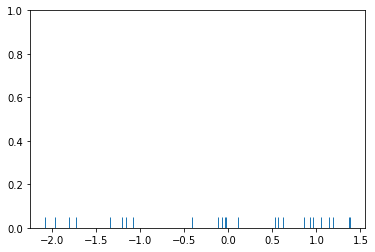

In [4]:
sns.rugplot(dataset)

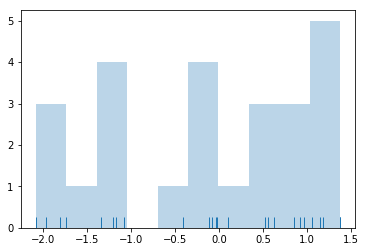

In [5]:
plt.hist(dataset, alpha = 0.3)
sns.rugplot(dataset)

(0, 1)

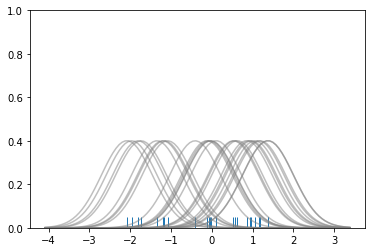

In [11]:
sns.rugplot(dataset)

x_min = dataset.min() - 2
x_max = dataset.max() + 2
x_axis = np.linspace(x_min, x_max, 100)

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**0.2

kernel_list = []
for data_point in dataset:
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    kernel = kernel / kernel.max()
    kernel = kernel *0.4
    plt.plot(x_axis, kernel, color = 'gray', alpha = 0.5)
plt.ylim(0,1)

Text(0.5,0.98,'Sum of the Basis Functions')

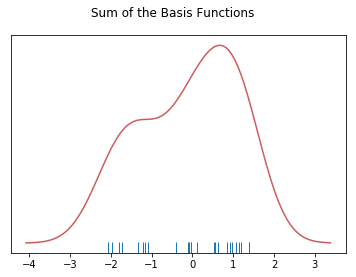

In [12]:
sum_of_kde = np.sum(kernel_list, axis = 0)

fig = plt.plot(x_axis, sum_of_kde, color = 'indianred')
sns.rugplot(dataset)
plt.yticks([])
plt.suptitle('Sum of the Basis Functions')

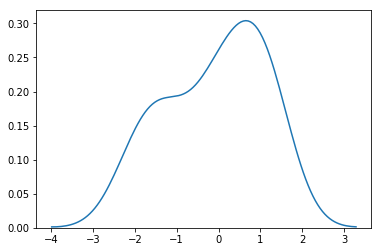

In [14]:
sns.kdeplot(dataset)

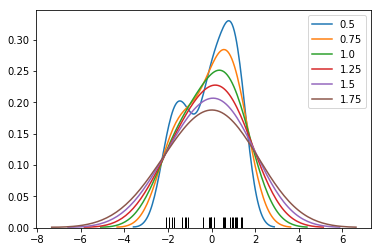

In [16]:
sns.rugplot(dataset, color = 'black')
for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset, bw = bw, label = bw)

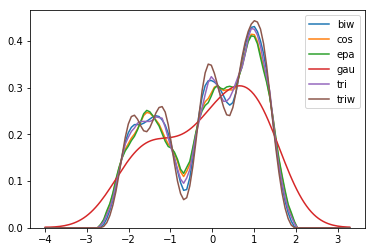

In [17]:
kernel_options = ['biw', 'cos', 'epa','gau','tri','triw']
for kern in kernel_options:
    sns.kdeplot(dataset, kernel = kern, label=kern)

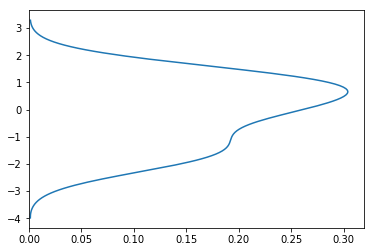

In [18]:
sns.kdeplot(dataset, vertical = True)

(array([ 3.,  4.,  8.,  8.,  9., 13., 14., 17., 20., 25.]),
 array([-2.08185464, -1.73593421, -1.39001378, -1.04409335, -0.69817292,
        -0.35225248, -0.00633205,  0.33958838,  0.68550881,  1.03142924,
         1.37734967]),
 <a list of 10 Patch objects>)

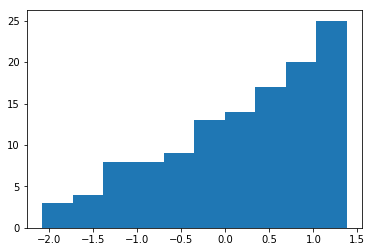

In [19]:
plt.hist(dataset, cumulative = True)

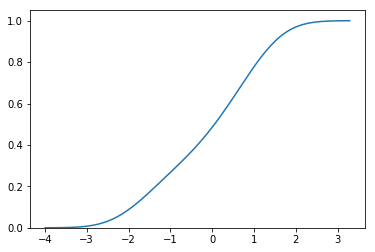

In [21]:
sns.kdeplot(dataset, cumulative = True)

In [22]:
mean = [0,0]
cov = [[1,0],[0,100]]
dataset2 = np.random.multivariate_normal(mean, cov, 1000)

C:\python\WPy-3662\python-3.6.6.amd64\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


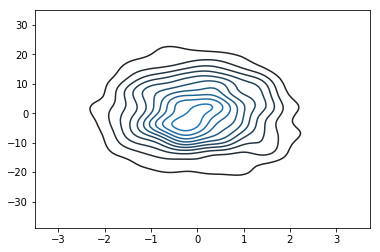

In [23]:
dframe = pd.DataFrame(dataset2, columns = ['X','Y'])
sns.kdeplot(dframe)

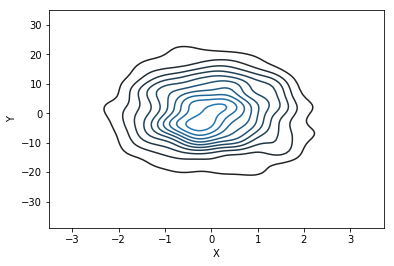

In [24]:
sns.kdeplot(dframe.X, dframe.Y)

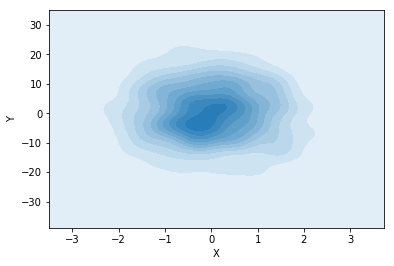

In [25]:
sns.kdeplot(dframe.X, dframe.Y, shade = True)

C:\python\WPy-3662\python-3.6.6.amd64\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


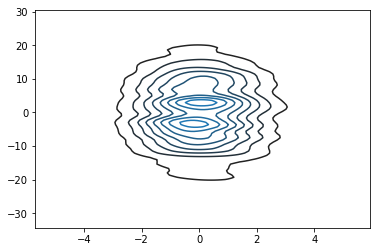

In [26]:
sns.kdeplot(dframe, bw = 1)

C:\python\WPy-3662\python-3.6.6.amd64\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


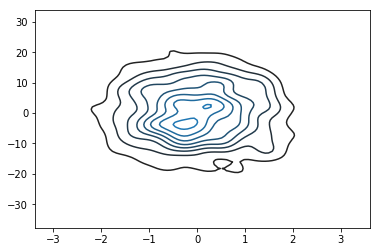

In [27]:
sns.kdeplot(dframe, bw = 'silverman')

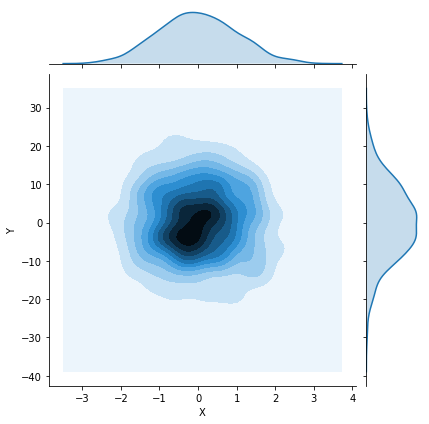

In [28]:
sns.jointplot('X','Y',dframe, kind = 'kde')

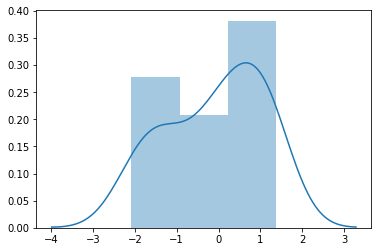

In [30]:
sns.distplot(dataset)